## 🧠 Problems with Batch Gradient Descent

Batch Gradient Descent (BGD) is conceptually simple and mathematically accurate,  
but it has several **practical limitations** when dealing with large datasets or real-time learning.

---

### ⚙️ 1. High Computational Cost
- In every epoch, BGD calculates the gradient using **all training samples**.
- This requires performing a full pass through the entire dataset before a single update.
- As the dataset grows, the time to compute each update increases drastically.

🧮 Example:
If the dataset has 1 million rows,  
one gradient update means processing all 1 million samples → **very slow convergence**.

---

### 💾 2. High Memory Usage
- Since all data points are required at once,  
  the entire dataset must fit into **memory (RAM)** during training.
- For very large datasets, this becomes infeasible.

⚠️ Real-world datasets (e.g., terabytes of data) cannot be loaded into memory completely.

---

### 🐢 3. Slow Convergence
- BGD updates weights **only once per epoch**,  
  meaning it waits until all samples are processed before improving the model.
- This leads to **delayed learning** — the model doesn’t start improving until the full dataset is seen.

---

### 🧱 4. Stuck in Local Minima (for Non-Convex Problems)
- Because it uses the **exact average gradient**,  
  the optimization path is very smooth and deterministic.
- This can cause the model to get stuck in **local minima** or flat regions of the loss surface.

---

### ⚡ 5. Not Suitable for Online / Streaming Data
- In real-time applications (like stock prediction, sensor data, or live user inputs),  
  data arrives continuously.
- BGD cannot handle such situations because it requires **all data upfront**  
  before starting any update.

---

### 🚫 Summary

| Problem | Description |
|----------|--------------|
| **Computation** | Full dataset processed per update → very slow |
| **Memory** | Entire data must fit into memory |
| **Convergence** | Weights updated only once per epoch |
| **Local Minima** | Deterministic updates can get stuck |
| **Online Learning** | Cannot adapt to streaming or incremental data |

---

### ✅ Therefore:
> While Batch Gradient Descent is accurate for small datasets,  
> it becomes inefficient and impractical for large-scale or real-time learning.  
> This is why **Stochastic Gradient Descent (SGD)** and **Mini-Batch GD** are preferred in practice.


---
## ⚡ Stochastic Gradient Descent (SGD)

### 🧩 Overview
**Stochastic Gradient Descent (SGD)** is an optimization algorithm used to minimize a loss function and find the best model parameters.  
Unlike **Batch Gradient Descent**, which updates parameters after processing the entire dataset,  
SGD updates the parameters **after every single training sample**.  

This makes it **faster** and **more memory-efficient**, especially for large datasets.

---

### 🧠 How It Works (for Linear Regression)

Prediction for a single sample:

$$
\hat{y}_i = w x_i + b
$$

Error for that sample:

$$
e_i = y_i - \hat{y}_i
$$

Loss for a single sample (Mean Squared Error):

$$
L_i = (y_i - \hat{y}_i)^2
$$

Gradients with respect to parameters:

$$
\frac{\partial L_i}{\partial w} = -2\, e_i\, x_i,
\quad
\frac{\partial L_i}{\partial b} = -2\, e_i
$$

Parameter update rules (using learning rate \( \eta \)):

$$
w \leftarrow w - \eta \frac{\partial L_i}{\partial w}
\quad \Rightarrow \quad
w = w + 2\eta\, e_i\, x_i
$$

$$
b \leftarrow b - \eta \frac{\partial L_i}{\partial b}
\quad \Rightarrow \quad
b = b + 2\eta\, e_i
$$

For multiple features (vector form):

$$
\hat{y}_i = \mathbf{w}^\top \mathbf{x}_i + b
$$

$$
\nabla_{\mathbf{w}} L_i = -2\, e_i\, \mathbf{x}_i,
\quad
\mathbf{w} \leftarrow \mathbf{w} + 2\eta\, e_i\, \mathbf{x}_i,
\quad
b \leftarrow b + 2\eta\, e_i
$$

---

### 🔁 Training Process (Conceptually)

1. Initialize parameters \( w, b \)
2. For each epoch:
   - Randomly select one sample \( (x_i, y_i) \)
   - Predict the output \( \hat{y}_i \)
   - Compute the error \( e_i = y_i - \hat{y}_i \)
   - Update \( w \) and \( b \) using the formulas above
3. Repeat for all samples across multiple epochs until the loss converges

---

### ⚙️ Characteristics

| Feature | Description |
|----------|-------------|
| **Update Frequency** | After every single sample |
| **Gradient Accuracy** | Noisy / Approximate |
| **Speed** | Very fast |
| **Memory Requirement** | Very low |
| **Convergence Behavior** | Fast but oscillatory |
| **Local Minima Handling** | Can escape due to randomness |

---

### ✅ Advantages

1. **Faster learning** for large datasets  
2. **Online learning** — can update continuously as new data arrives  
3. **Memory efficient** — no need to load all data into memory  
4. **Escapes local minima** more easily due to random updates  

---

### ⚠️ Limitations

1. The convergence path is **noisy and unstable**  
2. **Highly sensitive** to the learning rate  
3. May **overshoot** near the global minimum if learning rate is too large  

---

### 🚀 Summary

| Aspect | Batch Gradient Descent | Stochastic Gradient Descent |
|---------|------------------------|------------------------------|
| **Update per** | Full dataset | Single sample |
| **Speed** | Slow | Fast |
| **Memory Use** | High | Low |
| **Convergence Path** | Smooth | Noisy |
| **Large Dataset Handling** | Difficult | Excellent |
| **Online Learning** | Not supported | Supported |

---

> ✅ **In short:**  
> Stochastic Gradient Descent updates the model parameters after every individual sample,  
> which leads to faster learning and better scalability — especially useful for very large or streaming datasets.


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
data = pd.read_csv("Experience-Salary.csv")

In [3]:
data.head()

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236


In [9]:
X = data['exp(in months)'].values
Y = data['salary(in thousands)'].values

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

0.6206655661158283


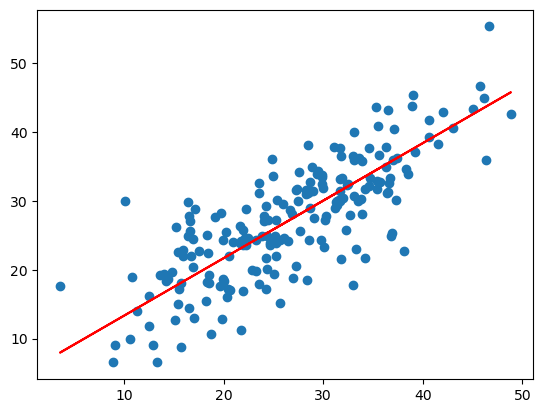

In [38]:
class StochasticGradient:
    def __init__(self):
        self.coef = 0
        self.intercept = 0
    def fit(self, x_train, y_train, epoches = 50, learning_rate = 0.001):
        for i in range(epoches):
            for j in range(x_train.shape[0]):
                row_num = np.random.randint(0, x_train.shape[0]) 
                y_pred = (self.coef * x_train[row_num]) + self.intercept
                
                slope_m = (-2 / len(x_train)) * np.sum(y_train[row_num] - y_pred) * x_train[row_num]
                self.coef = self.coef - (learning_rate * slope_m)
                
                slope_b = (-2/ len(x_train)) * (y_train[row_num] - y_pred)
                self.intercept = self.intercept - (learning_rate * slope_b)
                
    def predict(self, x_test):
        return x_test * self.coef + self.intercept              
sgd = StochasticGradient()
sgd.fit(x_train, y_train, 500, 0.05)
print(r2_score(y_test, sgd.predict(x_test))  )
plt.scatter(x_test, y_test)
plt.plot(x_test, sgd.predict(x_test), color = 'red')   
plt.show()     

In [39]:
pd.DataFrame({"R2 Score":[r2_score(y_test, sgd.predict(x_test))],
              "MSE":[mean_squared_error(y_test, sgd.predict(x_test))]})

,R2 Score,MSE
0,0.620666,27.66196


## 📊 Model Evaluation and Observation

After training the model using **Stochastic Gradient Descent**,  
the evaluation metrics are as follows:

| Metric | Value |
|---------|--------|
| R² Score | 0.620666|
| MSE | 27.66196 |

---

### 🔹 Interpretation

The **R² score (0.62)** and **MSE (27.66)** indicate that the model  
is not fitting the data very accurately yet.

However, in this notebook, the **primary objective** was not to  
achieve the best accuracy but to **implement the Stochastic Gradient Descent algorithm manually**  
and understand how it works mathematically and programmatically.

---

### 🔹 Why It’s Not Improved Further

The model’s performance could be improved by:
- Adjusting the **learning rate**
- Increasing the **number of epochs**
- Applying **feature scaling / normalization**
- Or using a **smaller step size**

But these steps are intentionally **not applied here**,  
because the main focus was to demonstrate the **algorithmic logic**  
rather than optimization or model tuning.

---

✅ **In short:**
> This implementation focuses on understanding **how Stochastic Descent works**,  
> not on achieving high accuracy or the best-fit line.
